<a href="https://colab.research.google.com/github/Karimi-Gichunge/Independent_project_week4/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2020_07_Winfred_Karimi_PythonNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries** **and loading datasets** 

In [1]:
#import libraries to our working environment
import pandas as pd

import numpy as np

In [2]:
#loading dataset
df = pd.read_csv('Autolib_dataset (2).csv')

## **Previewing the dataset**

In [3]:
#previewing dataset
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [4]:
#Looking at the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

### **Data Cleaning**

1.   **Consistency**




In [5]:
#Duplicates
#The columns cars and Blue Car Counter both contain values that are a duplicate of each other.
#Therefore,one of the columns will be dropped as shown below
df1 = df.drop(columns=['Cars'])
#Previewing the new table
df1.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [6]:
#Checking for duplicate rows and dropping them
df1 = df1.drop_duplicates()
#To check shape
df1.shape
#From output no rows are dropped hence no duplicates.

(5000, 24)



2.   **Validity**




In [7]:
#Here we select only the rows where the Status is not scheduled
df_2 = df1[df1.Status != 'scheduled']
#Checking shape to ensure the we only have the relevant rows
df_2.shape
#47 rows where the status was scheduled have been removed

(4953, 24)

In [8]:
#We can also drop the column 'Scheduled at' now that it's no longer relevant
#We can also drop the column 'Displayed comment'
df2 = df_2.drop(columns=['Scheduled at', 'Displayed comment'])
#Checking the shape to make sure that the column has been removed
df2.shape
#Two columns have been removed successfully


(4953, 22)



**3.Uniformity**



In [9]:
#Changing column names
df2.columns = [c.replace(' ', '_') for c in df2.columns]
df2.head()

,Address,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,Charging_Status,City,ID,Kind,Geo_point,Postal_code,Public_name,Rental_status,Slots,Station_type,Status,Subscription_status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23


In [10]:
#Combining the columns year,day and time into one column
#And changing the column to datatime datatype
df2['DateTime']=pd.to_datetime(df2[['year','month','day', 'hour', 'minute']])
df2.head()

,Address,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,Charging_Status,City,ID,Kind,Geo_point,Postal_code,Public_name,Rental_status,Slots,Station_type,Status,Subscription_status,year,month,day,hour,minute,DateTime
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00


In [11]:
#Dropping columns with year,month,day,hour,minute
df2 = df2.drop(columns=['year', 'month', 'day', 'hour', 'minute'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4953 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Address              4953 non-null   object        
 1   Bluecar_counter      4953 non-null   int64         
 2   Utilib_counter       4953 non-null   int64         
 3   Utilib_1.4_counter   4953 non-null   int64         
 4   Charge_Slots         4953 non-null   int64         
 5   Charging_Status      4953 non-null   object        
 6   City                 4953 non-null   object        
 7   ID                   4953 non-null   object        
 8   Kind                 4953 non-null   object        
 9   Geo_point            4953 non-null   object        
 10  Postal_code          4953 non-null   int64         
 11  Public_name          4953 non-null   object        
 12  Rental_status        4953 non-null   object        
 13  Slots                4953 non-nul



4.  **Accurancy**




In [12]:
#Dropping all rows where the value of "Bluecar counter" is less than 0 or greater than 7
nr = df2[(df2['Bluecar_counter'] < 0) & (df2['Bluecar_counter'] > 7) ].index
df2.drop(nr , inplace=True)
#Checking if any of the rows dropped
df2.shape
#From the result all rows are accurate and within range

(4953, 18)

In [13]:
#Dropping all rows where the value of "Bluecar counter" is less than 0 or greater than 7
nr = df2[(df2['Utilib_counter'] < 0) & (df2['Utilib_counter'] > 4) ].index
df2.drop(nr , inplace=True)
#Checking if any of the rows dropped
df2.shape
#From the result all rows are accurate and within range

(4953, 18)

In [14]:
#Dropping all rows where the value of "Bluecar counter" is less than 0 or greater than 7
nr = df2[(df2['Utilib_1.4_counter'] < 0) & (df2['Utilib_1.4_counter'] > 5) ].index
df2.drop(nr , inplace=True)
#Checking if any of the rows dropped
df2.shape
#From the result all rows are accurate and within range

(4953, 18)

In [15]:
#Dropping all rows where the value of "Bluecar counter" is less than 0 or greater than 7
nr = df2[(df2['Charge_Slots'] < 0) & (df2['Charge_Slots'] > 3) ].index
df2.drop(nr , inplace=True)
#Checking if any of the rows dropped
df2.shape
#From the result all rows are accurate and within range

(4953, 18)

**Note**: All the resources in the records are within range

# **Analysis**



1.   **Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.**




In [16]:
#Create a new dataframe where city is Paris
df_paris = df2[df2.City == 'Paris']
df_paris.head()


,Address,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,Charging_Status,City,ID,Kind,Geo_point,Postal_code,Public_name,Rental_status,Slots,Station_type,Status,Subscription_status,DateTime
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018-04-06 07:24:00
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018-04-06 07:02:00


In [20]:
#Arranging the dataframe from day 1 to day 9
paris = df_paris.sort_values(['ID', 'DateTime'],ascending=[True, True])
#Previewing the new dataframe and checking if it's been sorted
paris.head()


,Address,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,Charging_Status,City,ID,Kind,Geo_point,Postal_code,Public_name,Rental_status,Slots,Station_type,Status,Subscription_status,DateTime
710,8 Place du 25 AoÃ»t 1944,1,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,2,station,ok,nonexistent,2018-04-01 18:40:00
1891,8 Place du 25 AoÃ»t 1944,4,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,0,station,ok,nonexistent,2018-04-02 07:37:00
2312,8 Place du 25 AoÃ»t 1944,2,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,1,station,ok,nonexistent,2018-04-02 12:49:00
911,8 Place du 25 AoÃ»t 1944,3,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,0,station,ok,nonexistent,2018-04-04 03:10:00
4940,8 Place du 25 AoÃ»t 1944,1,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,1,station,ok,nonexistent,2018-04-04 18:48:00


In [21]:
#Resetting indexes after sorting
paris = paris.reset_index(drop=True)
paris.head()

,Address,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,Charging_Status,City,ID,Kind,Geo_point,Postal_code,Public_name,Rental_status,Slots,Station_type,Status,Subscription_status,DateTime
0,8 Place du 25 AoÃ»t 1944,1,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,2,station,ok,nonexistent,2018-04-01 18:40:00
1,8 Place du 25 AoÃ»t 1944,4,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,0,station,ok,nonexistent,2018-04-02 07:37:00
2,8 Place du 25 AoÃ»t 1944,2,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,1,station,ok,nonexistent,2018-04-02 12:49:00
3,8 Place du 25 AoÃ»t 1944,3,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,0,station,ok,nonexistent,2018-04-04 03:10:00
4,8 Place du 25 AoÃ»t 1944,1,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,1,station,ok,nonexistent,2018-04-04 18:48:00


In [24]:
#To get successive Bluecar_Counters
paris["diff_Bluecar"] = paris["Bluecar_counter"].diff(-1)
paris.head()

,Address,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,Charging_Status,City,ID,Kind,Geo_point,Postal_code,Public_name,Rental_status,Slots,Station_type,Status,Subscription_status,DateTime,diff_Bluecar
0,8 Place du 25 AoÃ»t 1944,1,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,2,station,ok,nonexistent,2018-04-01 18:40:00,-3.0
1,8 Place du 25 AoÃ»t 1944,4,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,0,station,ok,nonexistent,2018-04-02 07:37:00,2.0
2,8 Place du 25 AoÃ»t 1944,2,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,1,station,ok,nonexistent,2018-04-02 12:49:00,-1.0
3,8 Place du 25 AoÃ»t 1944,3,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,0,station,ok,nonexistent,2018-04-04 03:10:00,2.0
4,8 Place du 25 AoÃ»t 1944,1,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,1,station,ok,nonexistent,2018-04-04 18:48:00,0.0


In [36]:
new_dates, new_times = zip(*[(d.date(), d.time()) for d in paris['DateTime']])
df_dates = paris.assign(new_date=new_dates, new_time=new_times)
df_dates.head()

,Address,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,Charging_Status,City,ID,Kind,Geo_point,Postal_code,Public_name,Rental_status,Slots,Station_type,Status,Subscription_status,DateTime,diff_Bluecar,new_date,new_time
0,8 Place du 25 AoÃ»t 1944,1,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,2,station,ok,nonexistent,2018-04-01 18:40:00,-3.0,2018-04-01,18:40:00
1,8 Place du 25 AoÃ»t 1944,4,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,0,station,ok,nonexistent,2018-04-02 07:37:00,2.0,2018-04-02,07:37:00
2,8 Place du 25 AoÃ»t 1944,2,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,1,station,ok,nonexistent,2018-04-02 12:49:00,-1.0,2018-04-02,12:49:00
3,8 Place du 25 AoÃ»t 1944,3,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,0,station,ok,nonexistent,2018-04-04 03:10:00,2.0,2018-04-04,03:10:00
4,8 Place du 25 AoÃ»t 1944,1,0,0,0,nonexistent,Paris,paris-25aout1944-8,STATION,"48.822183, 2.3248774",75014,Paris/25 AoÃ»t 1944/8,operational,1,station,ok,nonexistent,2018-04-04 18:48:00,0.0,2018-04-04,18:48:00


In [25]:

paris.loc[0, 'DateTime'].day_name()

'Sunday'

In [38]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Address              2807 non-null   object        
 1   Bluecar_counter      2807 non-null   int64         
 2   Utilib_counter       2807 non-null   int64         
 3   Utilib_1.4_counter   2807 non-null   int64         
 4   Charge_Slots         2807 non-null   int64         
 5   Charging_Status      2807 non-null   object        
 6   City                 2807 non-null   object        
 7   ID                   2807 non-null   object        
 8   Kind                 2807 non-null   object        
 9   Geo_point            2807 non-null   object        
 10  Postal_code          2807 non-null   int64         
 11  Public_name          2807 non-null   object        
 12  Rental_status        2807 non-null   object        
 13  Slots                2807 non-nul

In [39]:
#Selecting the necessary columns only
selected_cols = ['new_time', 'diff_Bluecar']
data = df_dates[selected_cols]
data.head()

,new_time,diff_Bluecar
0,18:40:00,-3.0
1,07:37:00,2.0
2,12:49:00,-1.0
3,03:10:00,2.0
4,18:48:00,0.0


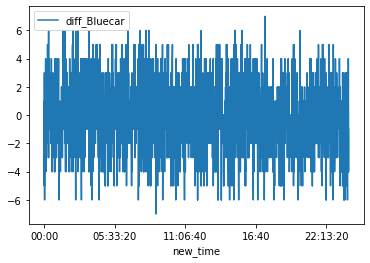

In [42]:
#Plotting
data.plot(x='new_time', y='diff_Bluecar');